In [401]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import csv

In [402]:
import requests
import requests as req
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import time
import pickle

In [403]:
from html_table_parser import parser_functions
from html_table_parser import parser_functions as parser

In [404]:
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [405]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

In [406]:
from collections import Counter

In [407]:
finan_dic = pd.read_excel('finance감성사전.xlsx', index_col='Unnamed: 0')

In [408]:
df = pd.read_pickle('D:\B_Project5\기사\LG화학.pickle')
df

,index,기업,날짜,제목,내용
0,0,LG화학,연합뉴스2017.01.31.네이버뉴스,LG화학 '꿈의 신소재' 탄소나노튜브 양산,"연간 400t 규모, 세계 4위 수준…2차전지·車부품 소재로 활용 LG화학이 '..."
1,1,LG화학,한국경제A12면 TOP2017.01.31.네이버뉴스,"LG화학, 철강보다 100배 강한 신소재 양산",전기·열 전도율도 뛰어나…배터리·항공기 동체 등에 사용 여수 전용공장 본격 가동...
2,2,LG화학,매일경제A23면 TOP2017.01.31.네이버뉴스,"LG화학, 유화제품 가격상승…올 이익 15%↑",신동력 바이오 투자도 확대…실적호조에 목표주가 상향 배터리 부문은 사드역풍 부담...
3,3,LG화학,SBS2017.01.30.네이버뉴스,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응""",미국 정부가 한국산 화학제품에 대해 첫 반덤핑 예비관세 부과 판정을 내린 것과 ...
4,4,LG화학,전자신문2017.01.31.네이버뉴스,"[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권","SK증권에서 31일 LG화학(051910)에 대해 ""2017 년은 GM BOLT..."
...,...,...,...,...,...
2995,5,LG화학,이코노미스트언론사 선정2021.12.23.네이버뉴스,"[마감시황] LG화학·삼성SDI 상승 마감, 게임株 일제히 하락세",2차 전지(전기차 배터리) 대장주 LG화학(1.44%)과 삼성SDI(1.74%)...
2996,6,LG화학,이코노미스트언론사 선정2021.12.28.네이버뉴스,[개장시황] 삼성SDI·LG화학 상승 출발…한국전력 6% 넘게 올라,"반면 네이버(0.13%)와 카카오(0.44%)는 소폭 올랐고, 삼성SDI(0.4..."
2997,7,LG화학,한국경제2021.12.20.네이버뉴스,"LG화학, 'S1P1' 표적 자가면역질환 치료제 中 2상 진입",LG화학의 자가면역질환 신약 후보물질이 중국 임상 2상에 진입했다. LG화학은 ...
2998,8,LG화학,서울경제2021.12.30.네이버뉴스,[시그널] “억대 뭉칫돈 구해라”···IPO 앞두고 분주한 LG엔솔 직원들,#LG화학(051910)에서 물적분할과 함께 LG(003550)에너지솔루션으로 ...


In [409]:
df['날짜'] = df['날짜'].apply(lambda x : str(datetime.strptime(re.search(r'\d{4}.\d{2}.\d{2}', x).group(), '%Y.%m.%d').date()))

In [410]:
df

,index,기업,날짜,제목,내용
0,0,LG화학,2017-01-31,LG화학 '꿈의 신소재' 탄소나노튜브 양산,"연간 400t 규모, 세계 4위 수준…2차전지·車부품 소재로 활용 LG화학이 '..."
1,1,LG화학,2017-01-31,"LG화학, 철강보다 100배 강한 신소재 양산",전기·열 전도율도 뛰어나…배터리·항공기 동체 등에 사용 여수 전용공장 본격 가동...
2,2,LG화학,2017-01-31,"LG화학, 유화제품 가격상승…올 이익 15%↑",신동력 바이오 투자도 확대…실적호조에 목표주가 상향 배터리 부문은 사드역풍 부담...
3,3,LG화학,2017-01-30,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응""",미국 정부가 한국산 화학제품에 대해 첫 반덤핑 예비관세 부과 판정을 내린 것과 ...
4,4,LG화학,2017-01-31,"[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권","SK증권에서 31일 LG화학(051910)에 대해 ""2017 년은 GM BOLT..."
...,...,...,...,...,...
2995,5,LG화학,2021-12-23,"[마감시황] LG화학·삼성SDI 상승 마감, 게임株 일제히 하락세",2차 전지(전기차 배터리) 대장주 LG화학(1.44%)과 삼성SDI(1.74%)...
2996,6,LG화학,2021-12-28,[개장시황] 삼성SDI·LG화학 상승 출발…한국전력 6% 넘게 올라,"반면 네이버(0.13%)와 카카오(0.44%)는 소폭 올랐고, 삼성SDI(0.4..."
2997,7,LG화학,2021-12-20,"LG화학, 'S1P1' 표적 자가면역질환 치료제 中 2상 진입",LG화학의 자가면역질환 신약 후보물질이 중국 임상 2상에 진입했다. LG화학은 ...
2998,8,LG화학,2021-12-30,[시그널] “억대 뭉칫돈 구해라”···IPO 앞두고 분주한 LG엔솔 직원들,#LG화학(051910)에서 물적분할과 함께 LG(003550)에너지솔루션으로 ...


In [411]:
df['제목_내용'] = df['제목'] + df['내용']

In [412]:
df.head()

,index,기업,날짜,제목,내용,제목_내용
0,0,LG화학,2017-01-31,LG화학 '꿈의 신소재' 탄소나노튜브 양산,"연간 400t 규모, 세계 4위 수준…2차전지·車부품 소재로 활용 LG화학이 '...","LG화학 '꿈의 신소재' 탄소나노튜브 양산 연간 400t 규모, 세계 4위 수준…..."
1,1,LG화학,2017-01-31,"LG화학, 철강보다 100배 강한 신소재 양산",전기·열 전도율도 뛰어나…배터리·항공기 동체 등에 사용 여수 전용공장 본격 가동...,"LG화학, 철강보다 100배 강한 신소재 양산 전기·열 전도율도 뛰어나…배터리·항..."
2,2,LG화학,2017-01-31,"LG화학, 유화제품 가격상승…올 이익 15%↑",신동력 바이오 투자도 확대…실적호조에 목표주가 상향 배터리 부문은 사드역풍 부담...,"LG화학, 유화제품 가격상승…올 이익 15%↑ 신동력 바이오 투자도 확대…실적호조..."
3,3,LG화학,2017-01-30,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응""",미국 정부가 한국산 화학제품에 대해 첫 반덤핑 예비관세 부과 판정을 내린 것과 ...,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응"" 미국 정부가 한국산 화학제품..."
4,4,LG화학,2017-01-31,"[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권","SK증권에서 31일 LG화학(051910)에 대해 ""2017 년은 GM BOLT...","[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권 SK증권에서 ..."


In [413]:
# df['token'] = df['제목_내용'].apply(lambda x : re.compile('[ㄱ-ㅎ가-힣]+').findall(x))
# df.head()

In [414]:
okt = Okt()
n_ = []
title_rename = []

for i in range(len(df)):
    if(i % 10000 == 0):
        print(i, '단계 완료')
#     title_rename.append(re.sub("[\(\[].*?[\)\]]", "",df.iloc[i]['제목_내용']))
    n_.append(' '.join(okt.morphs(df.iloc[i]['제목_내용'])))
df['token'] = n_
df = df[df['token'] != '']
df['token'] = df['token'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    
        

0 단계 완료


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7560/2700314478.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['token'] = df['token'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [415]:
finan_dic['score'] = finan_dic['pos'].apply(lambda x : 1 if x == 1 else -1)
finan_dic

,neg,pos,score
결국,1,0,-1
결함,1,0,-1
공허한,1,0,-1
과적,1,0,-1
극심한,1,0,-1
...,...,...,...
해결,0,1,1
호황,0,1,1
확보,0,1,1
활력,0,1,1


In [416]:
df['senti_score'] = df['token'].apply(lambda x : sum([finan_dic.loc[token,'score'] for token in x.split() if token in finan_dic.index]))
df

,index,기업,날짜,제목,내용,제목_내용,token,senti_score
0,0,LG화학,2017-01-31,LG화학 '꿈의 신소재' 탄소나노튜브 양산,"연간 400t 규모, 세계 4위 수준…2차전지·車부품 소재로 활용 LG화학이 '...","LG화학 '꿈의 신소재' 탄소나노튜브 양산 연간 400t 규모, 세계 4위 수준…...",화학 꿈 의 신소재 탄소 나노튜브 양산 연간 규모 세계 위 수준 차...,0
1,1,LG화학,2017-01-31,"LG화학, 철강보다 100배 강한 신소재 양산",전기·열 전도율도 뛰어나…배터리·항공기 동체 등에 사용 여수 전용공장 본격 가동...,"LG화학, 철강보다 100배 강한 신소재 양산 전기·열 전도율도 뛰어나…배터리·항...",화학 철강 보다 배 강한 신소재 양산 전기 열 전도율 도 뛰어나 배터리 ...,1
2,2,LG화학,2017-01-31,"LG화학, 유화제품 가격상승…올 이익 15%↑",신동력 바이오 투자도 확대…실적호조에 목표주가 상향 배터리 부문은 사드역풍 부담...,"LG화학, 유화제품 가격상승…올 이익 15%↑ 신동력 바이오 투자도 확대…실적호조...",화학 유화 제품 가격 상승 올 이익 신동 력 바이오 투자 도 확대 실적 ...,0
3,3,LG화학,2017-01-30,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응""",미국 정부가 한국산 화학제품에 대해 첫 반덤핑 예비관세 부과 판정을 내린 것과 ...,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응"" 미국 정부가 한국산 화학제품...",화학 반덤핑 관세 에 영향 적지 만 적극 대응 미국 정부 가 한 국산 화학...,2
4,4,LG화학,2017-01-31,"[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권","SK증권에서 31일 LG화학(051910)에 대해 ""2017 년은 GM BOLT...","[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권 SK증권에서 ...",로봇 뉴스 화학 년 은 매수 유지 증권 증권 에서 일 화학 ...,0
...,...,...,...,...,...,...,...,...
2995,5,LG화학,2021-12-23,"[마감시황] LG화학·삼성SDI 상승 마감, 게임株 일제히 하락세",2차 전지(전기차 배터리) 대장주 LG화학(1.44%)과 삼성SDI(1.74%)...,"[마감시황] LG화학·삼성SDI 상승 마감, 게임株 일제히 하락세 2차 전지(전기...",마감 시 황 화학 삼성 상승 마감 게임 일제 히 하락 세 차 전지 ...,-1
2996,6,LG화학,2021-12-28,[개장시황] 삼성SDI·LG화학 상승 출발…한국전력 6% 넘게 올라,"반면 네이버(0.13%)와 카카오(0.44%)는 소폭 올랐고, 삼성SDI(0.4...",[개장시황] 삼성SDI·LG화학 상승 출발…한국전력 6% 넘게 올라 반면 네이버(...,개장 시 황 삼성 화학 상승 출발 한국전력 넘게 올라 반면 네이버 ...,1
2997,7,LG화학,2021-12-20,"LG화학, 'S1P1' 표적 자가면역질환 치료제 中 2상 진입",LG화학의 자가면역질환 신약 후보물질이 중국 임상 2상에 진입했다. LG화학은 ...,"LG화학, 'S1P1' 표적 자가면역질환 치료제 中 2상 진입 LG화학의 자가면역...",화학 표적 자가면역질환 치료 제 상 진입 화학 의 자가면역질환 ...,0
2998,8,LG화학,2021-12-30,[시그널] “억대 뭉칫돈 구해라”···IPO 앞두고 분주한 LG엔솔 직원들,#LG화학(051910)에서 물적분할과 함께 LG(003550)에너지솔루션으로 ...,[시그널] “억대 뭉칫돈 구해라”···IPO 앞두고 분주한 LG엔솔 직원들 #LG...,시그널 억대 뭉칫돈 구해 라 앞두고 분주한 엔솔 직원 들 화학 에...,0


In [417]:
df['senti_state'] = df['senti_score'].apply(lambda x : 1 if x > 0 else x).apply(lambda x : -1 if x < 0 else x)

<AxesSubplot:ylabel='Frequency'>

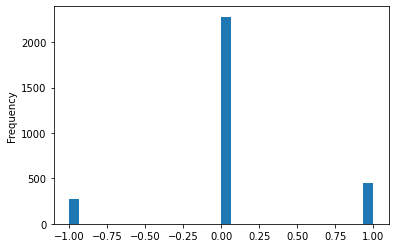

In [418]:
df['senti_state'].plot(kind='hist',bins=30)

In [419]:
df['senti_state'].value_counts()

 0    2281
 1     445
-1     274
Name: senti_state, dtype: int64

In [420]:
test = df.loc[917, 'nouns']
test

KeyError: 'nouns'

In [227]:
# 중복단어 확인

for i in test:
    for j in finan_dic.index:
        if i == j:
            print(i)

적극


In [228]:
# 단어별 개수

counter={}
for i in test:
    for j in finan_dic.index:
        if i == j:
            if i in counter:
                counter[i] += 1
            else:
                counter[i] = 1
counter

{'적극': 1}

In [229]:
# 감정 점수

emotion_score = {}

for key in counter.keys():
    for word in finan_dic.index:
        if key == word:
            for label in finan_dic.columns[finan_dic.loc[key,:] == 1]:
                if label in emotion_score:
                    emotion_score[label] += 1
                else:
                    emotion_score[label] = 1
emotion_score

{'pos': 1}

In [421]:
df1 = pd.read_pickle('D:\B_Project5\기사\LG화학.pickle')
df2 = pd.read_pickle('D:\B_Project5\기사\흥구석유.pickle')

In [422]:
df = pd.concat([df1, df2])
df

,index,기업,날짜,제목,내용
0,0,LG화학,연합뉴스2017.01.31.네이버뉴스,LG화학 '꿈의 신소재' 탄소나노튜브 양산,"연간 400t 규모, 세계 4위 수준…2차전지·車부품 소재로 활용 LG화학이 '..."
1,1,LG화학,한국경제A12면 TOP2017.01.31.네이버뉴스,"LG화학, 철강보다 100배 강한 신소재 양산",전기·열 전도율도 뛰어나…배터리·항공기 동체 등에 사용 여수 전용공장 본격 가동...
2,2,LG화학,매일경제A23면 TOP2017.01.31.네이버뉴스,"LG화학, 유화제품 가격상승…올 이익 15%↑",신동력 바이오 투자도 확대…실적호조에 목표주가 상향 배터리 부문은 사드역풍 부담...
3,3,LG화학,SBS2017.01.30.네이버뉴스,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응""",미국 정부가 한국산 화학제품에 대해 첫 반덤핑 예비관세 부과 판정을 내린 것과 ...
4,4,LG화학,전자신문2017.01.31.네이버뉴스,"[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권","SK증권에서 31일 LG화학(051910)에 대해 ""2017 년은 GM BOLT..."
...,...,...,...,...,...
1364,5,흥구석유,아이투자2021.12.22.,"[오후 거래 급증주 점검] 우리산업홀딩스, 거래량↑… 그 외 종목은?","이 밖에 카프로, 삼일기업공사, 케이씨피드, 벽산, 지더블유바이텍, 흥구석유 등..."
1365,6,흥구석유,아이투자2021.12.22.,[강세업종] 에너지 관련주 상승세…중앙에너비스 18%↑,"이 밖에 대성산업, 세원이앤씨, 흥구석유, 젬백스지오, 극동유화, 스페코 등의 ..."
1366,7,흥구석유,여성소비자신문2021.12.10.,석유가스 상장기업 브랜드평판 1~3위는,"2021년 12월 석유가스 상장기업 브랜드평판 순위는 SK이노베이션, GS, 에..."
1367,8,흥구석유,여성소비자신문2021.12.10.,석유가스 상장기업 기업평판 우수기업 2021년 12월 발표,석유가스 상장기업 브랜드평판 2021년 12월 빅데이터 분석 순위는 SK이노베이...


In [423]:
df['제목_내용'] = df['제목'] + df['내용']

In [424]:
n_ = []
title_rename = []

for i in range(len(df)):
    if(i % 10000 == 0):
        print(i, '단계 완료')
#     title_rename.append(re.sub("[\(\[].*?[\)\]]", "",df.iloc[i]['제목_내용']))
    n_.append(' '.join(okt.morphs(df.iloc[i]['제목_내용'])))
df['token'] = n_
df = df[df['token'] != '']
df['token'] = df['token'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    

0 단계 완료


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7560/3414097668.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['token'] = df['token'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [425]:
df['senti_score'] = df['token'].apply(lambda x : sum([finan_dic.loc[token,'score'] for token in x.split() if token in finan_dic.index]))

In [426]:
df['senti_state'] = df['senti_score'].apply(lambda x : 1 if x > 0 else x).apply(lambda x : -1 if x < 0 else x)

In [427]:
df

,index,기업,날짜,제목,내용,제목_내용,token,senti_score,senti_state
0,0,LG화학,연합뉴스2017.01.31.네이버뉴스,LG화학 '꿈의 신소재' 탄소나노튜브 양산,"연간 400t 규모, 세계 4위 수준…2차전지·車부품 소재로 활용 LG화학이 '...","LG화학 '꿈의 신소재' 탄소나노튜브 양산 연간 400t 규모, 세계 4위 수준…...",화학 꿈 의 신소재 탄소 나노튜브 양산 연간 규모 세계 위 수준 차...,0,0
1,1,LG화학,한국경제A12면 TOP2017.01.31.네이버뉴스,"LG화학, 철강보다 100배 강한 신소재 양산",전기·열 전도율도 뛰어나…배터리·항공기 동체 등에 사용 여수 전용공장 본격 가동...,"LG화학, 철강보다 100배 강한 신소재 양산 전기·열 전도율도 뛰어나…배터리·항...",화학 철강 보다 배 강한 신소재 양산 전기 열 전도율 도 뛰어나 배터리 ...,1,1
2,2,LG화학,매일경제A23면 TOP2017.01.31.네이버뉴스,"LG화학, 유화제품 가격상승…올 이익 15%↑",신동력 바이오 투자도 확대…실적호조에 목표주가 상향 배터리 부문은 사드역풍 부담...,"LG화학, 유화제품 가격상승…올 이익 15%↑ 신동력 바이오 투자도 확대…실적호조...",화학 유화 제품 가격 상승 올 이익 신동 력 바이오 투자 도 확대 실적 ...,0,0
3,3,LG화학,SBS2017.01.30.네이버뉴스,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응""",미국 정부가 한국산 화학제품에 대해 첫 반덤핑 예비관세 부과 판정을 내린 것과 ...,"LG화학, 美반덤핑 관세에 ""영향 적지만 적극 대응"" 미국 정부가 한국산 화학제품...",화학 반덤핑 관세 에 영향 적지 만 적극 대응 미국 정부 가 한 국산 화학...,2,1
4,4,LG화학,전자신문2017.01.31.네이버뉴스,"[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권","SK증권에서 31일 LG화학(051910)에 대해 ""2017 년은 GM BOLT...","[로봇뉴스]LG화학, ""2017 년은 GM…"" 매수(유지)-SK증권 SK증권에서 ...",로봇 뉴스 화학 년 은 매수 유지 증권 증권 에서 일 화학 ...,0,0
...,...,...,...,...,...,...,...,...,...
1364,5,흥구석유,아이투자2021.12.22.,"[오후 거래 급증주 점검] 우리산업홀딩스, 거래량↑… 그 외 종목은?","이 밖에 카프로, 삼일기업공사, 케이씨피드, 벽산, 지더블유바이텍, 흥구석유 등...","[오후 거래 급증주 점검] 우리산업홀딩스, 거래량↑… 그 외 종목은? 이 밖에 카...",오후 거래 급증 주 점검 우리 산업 홀딩스 거래 량 그 외 종목 은 이 ...,0,0
1365,6,흥구석유,아이투자2021.12.22.,[강세업종] 에너지 관련주 상승세…중앙에너비스 18%↑,"이 밖에 대성산업, 세원이앤씨, 흥구석유, 젬백스지오, 극동유화, 스페코 등의 ...","[강세업종] 에너지 관련주 상승세…중앙에너비스 18%↑ 이 밖에 대성산업, 세원이...",강세 업종 에너지 관련 주 상승세 중앙 에 너비 스 이 밖에 대성 산업 ...,1,1
1366,7,흥구석유,여성소비자신문2021.12.10.,석유가스 상장기업 브랜드평판 1~3위는,"2021년 12월 석유가스 상장기업 브랜드평판 순위는 SK이노베이션, GS, 에...",석유가스 상장기업 브랜드평판 1~3위는 2021년 12월 석유가스 상장기업 브랜드...,석유 가스 상장 기업 브랜드 평판 위 는 년 월 석유 가스 상장 기업 브랜드 평판...,0,0
1367,8,흥구석유,여성소비자신문2021.12.10.,석유가스 상장기업 기업평판 우수기업 2021년 12월 발표,석유가스 상장기업 브랜드평판 2021년 12월 빅데이터 분석 순위는 SK이노베이...,석유가스 상장기업 기업평판 우수기업 2021년 12월 발표 석유가스 상장기업 브랜...,석유 가스 상장 기업 기업 평판 우수 기업 년 월 발표 석유 가스 상장 기업 브랜드...,0,0


array([<AxesSubplot:title={'center':'LG화학'}>,
       <AxesSubplot:title={'center':'흥구석유'}>], dtype=object)

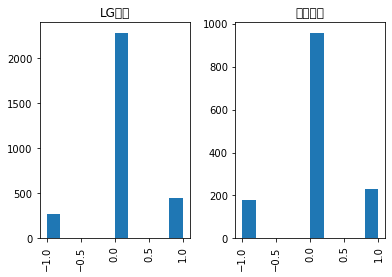

In [430]:
df.hist(column='senti_state', by='기업')

In [365]:
sd = pd.DataFrame(df.groupby('기업')['senti_state'].value_counts())
sd

senti_state
기업   senti_state             
LG화학  0                  2281
      1                   445
     -1                   274
흥구석유  0                   958
      1                   230
     -1                   181

In [395]:
# 긍정이 부정보다 많은 기업만 뽑기

for i in range(1,6,3):
    if int(sd.iloc[i].values) > int(sd.iloc[i+1]):
        print(sd.index[i][0])

LG화학
흥구석유
